In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

W0902 23:39:37.210004  1356 deprecation.py:323] From <ipython-input-3-eef628746518>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0902 23:39:37.215428  1356 deprecation.py:323] From C:\Users\Nikhil Saxena\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0902 23:39:37.218421  1356 deprecation.py:323] From C:\Users\Nikhil Saxena\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a 

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0902 23:39:46.890086  1356 deprecation.py:323] From C:\Users\Nikhil Saxena\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0902 23:39:46.905082  1356 deprecation.py:323] From C:\Users\Nikhil Saxena\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0902 23:39:49.414344  1356 deprecation.py:323] From C:\Users\Nikhil Saxena\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000022158DC83C8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002215428DBA8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002215B9CCB00>)

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.images.shape , mnist.train.labels.shape

((55000, 784), (55000, 10))

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

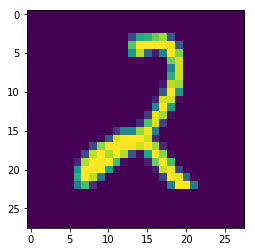

In [10]:
first_image = mnist.train.images[1222]
first_image = np.array(first_image, dtype = 'float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [11]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [12]:
def forward_propogation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    
    return output

In [13]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])
pred = forward_propogation(x,weights,biases)

In [14]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))

W0902 23:39:50.798638  1356 deprecation.py:323] From <ipython-input-14-13d7f98a4963>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
batch_size = 100
for i in range(25):
    num_batch = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimize],feed_dict = {x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

27572.656469345093
5265.742439940572
2774.990697246045
1818.234224002396
1355.656748971559
1300.7669701371096
1110.218102472145
935.4777083307015
895.5564244620707
861.0501189980819
734.2667998779198
649.7892353372783
550.1603906244784
525.2341484709068
415.8186860564714
395.6278853370974
407.2263808555036
377.48835516956797
300.7549032531093
306.68572800081336
291.1730360625965
215.3890152199443
223.31209102579902
195.4339476702516
168.50639321851557


In [18]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,correct_labels)
predictions,correct_predictions = sess.run([predictions,correct_predictions],feed_dict = {x:mnist.test.images , y:mnist.test.labels})
correct_predictions.sum()

9608